# Titanic Machine Learning using Decision Tree Classifier
## By Jeremy Cui
This is a model that will use Decision Tree Classifier to predict survivors of the Titanic. This is a submission to the "Titanic - Machine Learning from Disaster" on kaggle.com.

In [76]:
# import necessary packages
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
# import Titanic training and test data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [65]:
# clean training data of NaN
df_train = df_train.dropna()
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [66]:
# clean test data of NaN
df_test = df_test.dropna()
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [67]:
# converts sex characteristic to binary indicator in order to fit data to tree
df_train['is_female'] = df_train['Sex'] == 'female'

In [84]:
# Creates feature list 
feat_list = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'is_female']

# create training data objects to fit to tree
x = df_train.loc[:, feat_list].values
y = df_train.loc[:, 'Survived'].values

# build Decision Tree Classifier
dec_tree_clf = tree.DecisionTreeClassifier(max_depth=3)

# fit training data to tree
dec_tree_clf = dec_tree_clf.fit(x, y)

In [70]:
dec_tree_clf

DecisionTreeClassifier(max_depth=3)

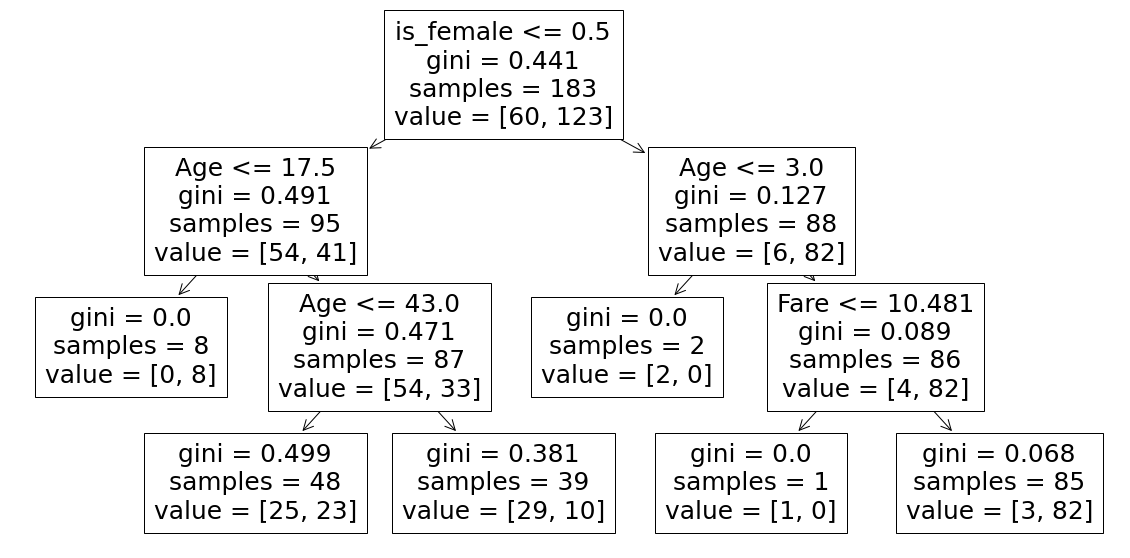

In [71]:
# visually display decision tree
plt.figure()
plt.gcf().set_size_inches(20, 10)
tree.plot_tree(dec_tree_clf, feature_names = feat_list)
plt.show()

In [85]:
# converts sex characteristic to binary indicator in order to fit data to tree
df_test['is_female'] = df_test['Sex'] == 'female'
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_female
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,True
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,True
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,True
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C,True
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C,False
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C,False
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,False
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,True


In [74]:
dec_tree_clf

DecisionTreeClassifier(max_depth=3)

In [77]:
# create test data object to test on the tree
x_test = df_test.loc[:, feat_list].values

y_pred = dec_tree_clf.predict(x)

In [78]:
# prints the accuracy of tree model
print('Accuracy:',metrics.accuracy_score(y, y_pred))

Accuracy: 0.8032786885245902


# Conclusion
Using the Decision Tree Classifier model allows me to partition the data based on attributes to identify the most significant attribute that affects the desired outcome. Using a max_depth allows me to avoid overfitting or underfitting the data. The model's accuracy measures 0.8033, which is a very strong performance of its predicting capability.